In [38]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import helper
from tqdm import tqdm

In [39]:
train_data = helper.load_data_from_file("../data/graph_data.json") # dictionary of SMILES and values are graphs

In [ ]:
# get all the unique atom types, orbitals and their respective binding energies
atomic_energies = {}
for mol in train_data:
    graph = train_data[mol]
    atom = list(nx.get_node_attributes(graph, "atom_type").values())
    orb = list(nx.get_node_attributes(graph, "orbitals").values())
    energy = list(nx.get_node_attributes(graph, "binding_energies").values())

    for i in range(len(atom)):
        if atom[i] not in atomic_energies:
            atomic_energies[atom[i]] = {}
        for orb_type, orb_energy in zip(orb[i], energy[i]):
            if orb_type == - 1:
                continue
            if orb_type not in atomic_energies[atom[i]]:
                atomic_energies[atom[i]][orb_type] = []
            atomic_energies[atom[i]][orb_type].append(orb_energy)

In [ ]:
# average the binding energies for each atom type and orbital
from statistics import mean, stdev

atomic_stats = {}

for atom_type, orbitals in atomic_energies.items():
    atomic_stats[atom_type] = {}
    for orbital, energies in orbitals.items():
        if energies: 
            atomic_stats[atom_type][orbital] = {
                "mean": mean(energies),
                "std": stdev(energies) if len(energies) > 1 else 0 
            }

atomic_stats

{'Ag': {'3d5/2': {'mean': 375.55, 'std': 0}},
 'C': {'1s': {'mean': 291.8558726239662, 'std': 1.9579527137374084}},
 'O': {'1s': {'mean': 539.239671178517, 'std': 2.638814937247745}},
 'F': {'1s': {'mean': 692.8733633217993, 'std': 11.46477775711718}},
 'Al': {'2p3/2': {'mean': 80.21000000000001, 'std': 1.0934044692305456}},
 'Ar': {'2s': {'mean': 326.37, 'std': 0}, '2p3/2': {'mean': 248.62, 'std': 0}},
 'As': {'2p3/2': {'mean': 1330.1, 'std': 0.0},
  '3s': {'mean': 212.23333333333332, 'std': 0.1527525231652015},
  '3d': {'mean': 54.8, 'std': 1.6970562748477132}},
 'B': {'1s': {'mean': 195.749609375, 'std': 1.422192692283572}},
 'Br': {'3p3/2': {'mean': 190.08444444444444, 'std': 0.48905805154170684},
  '3d5/2': {'mean': 77.40784615384615, 'std': 4.2220714674152005},
  '3s': {'mean': 264.27, 'std': 0}},
 'N': {'1s': {'mean': 406.23225943396227, 'std': 3.9816820473148846}},
 'P': {'2p3/2': {'mean': 139.14484929078014, 'std': 2.5171986161998707},
  '1s': {'mean': 2154.108888888889, 'std'

In [95]:
import pandas as pd
pdtable = pd.read_csv("../data/periodictable.csv", usecols=[0, 2])
pdtable.index = pdtable["AtomicNumber"]
pddict = pdtable['Symbol'].to_dict()
pdflip = dict((v,k) for k,v in pddict.items())

In [96]:
# plot the mean and std of binding energies for each atom type and orbital
atoms = []
orbitals = []
mean_energies = []
std_energies = []

for atom_type, orbital_data in atomic_stats.items():
    for orbital, stats in orbital_data.items():
        atoms.append(atom_type)
        orbitals.append(orbital)
        mean_energies.append(stats["mean"])
        std_energies.append(stats["std"])

In [98]:
atomic_numbers = []
for atom in atoms:
    atomic_numbers.append(pdflip[atom])


In [100]:
sort_idx = np.argsort(atomic_numbers)

In [101]:
atoms = np.array(atoms)[sort_idx]
orbitals = np.array(orbitals)[sort_idx]
mean_energies = np.array(mean_energies)[sort_idx]
std_energies = np.array(std_energies)[sort_idx]


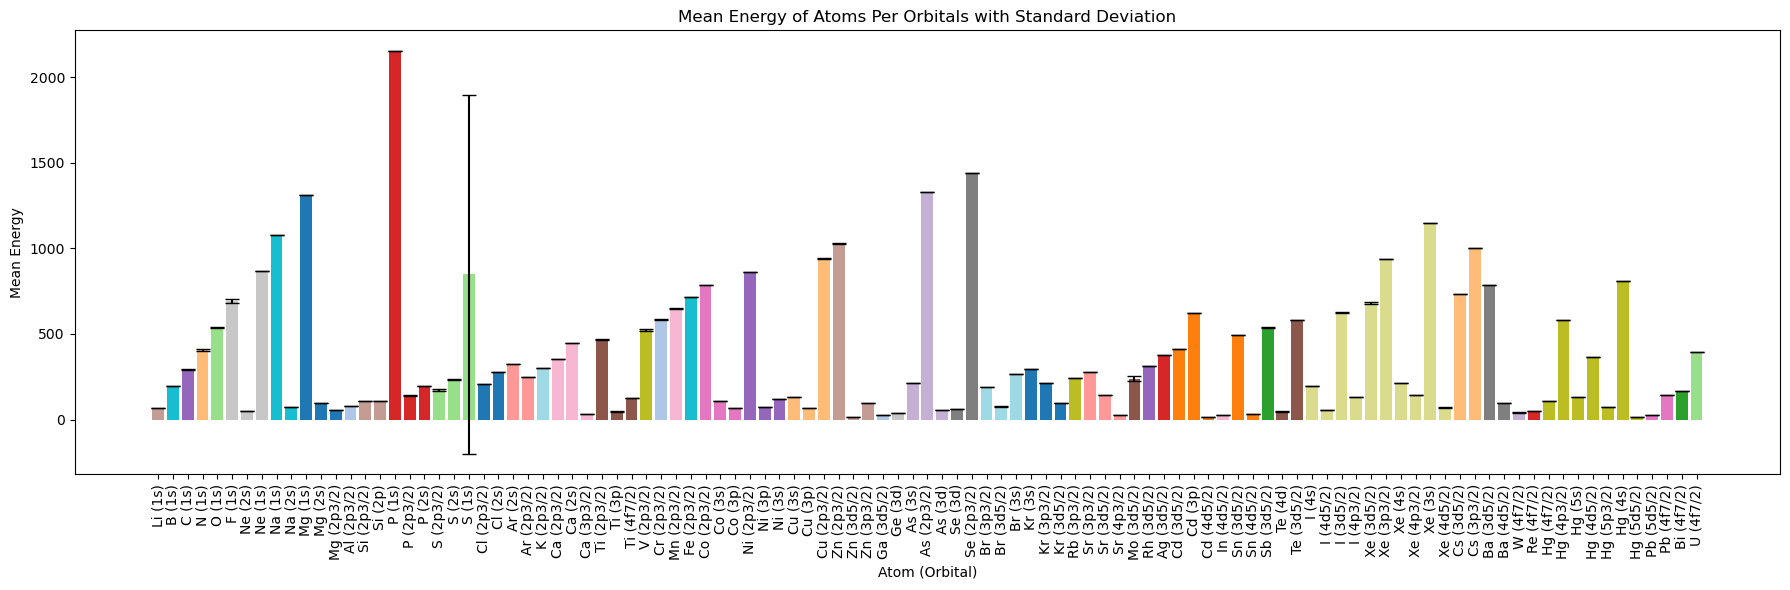

In [102]:
plt.figure(figsize=(18, 6))
unique_atoms = list(set(atoms))
atom_colors = {atom: plt.cm.tab20(i / len(unique_atoms)) for i, atom in enumerate(unique_atoms)}
bar_colors = [atom_colors[atom] for atom in atoms]

plt.bar(
    range(len(mean_energies)),
    mean_energies,
    yerr=std_energies,
    capsize=5,
    tick_label=[f"{a} ({o})" for a, o in zip(atoms, orbitals)],
    color=bar_colors
)
plt.xticks(rotation=90)
plt.xlabel("Atom (Orbital)")
plt.ylabel("Mean Energy")
plt.title("Mean Energy of Atoms Per Orbitals with Standard Deviation")
plt.tight_layout()
plt.show()